Utilizando a toolbox de sua preferência, realize o treinamento de uma rede neural artificial do tipo Perceptron Multicamadas para resolver um problema de classificação multiclasses. Além do conjunto de treinamento, considere um conjunto de validação para avaliação final do método. 

Descreva as características dos dados, descreva a arquitetura da rede (dimensão, número de camadas) e discuta aspectos de desempenho (forma de divisão dos dados para treinamento, validação e teste, porcentagem de classificação correta, matriz de confusão).

## Training a MLP
___

In [1]:
## importing packages

import matplotlib.pyplot as plt
import pandas as pd


from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.utils.vis_utils import plot_model
from keras import regularizers

Using TensorFlow backend.


In [2]:
## loading the dataset

df = pd.read_csv('../data/final/final_dataframe.csv',sep=';')

In [3]:
## inspecting the dataset

df.head()

,volatile_acid_types_high,volatile_acid_types_highest,volatile_acid_types_low,volatile_acid_types_lowest,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,rest_of_sulfur,target
0,0.0,1.0,0.0,0.0,0.436240,1.773922,-5.199338,-0.593940,0.933910,-1.100140,-1.204935,0.983573,1.689670,0.396560,-0.819656,-1.109378,0
1,0.0,1.0,0.0,0.0,0.731515,2.325972,-5.199338,-0.114415,1.593219,-0.207223,-0.791884,0.613509,-0.041413,1.111702,-0.360172,-0.833781,0
2,0.0,1.0,0.0,0.0,0.731515,1.976943,-1.684464,-0.265284,1.428482,-0.803958,-0.922330,0.680013,0.322932,0.963423,-0.360172,-0.862544,0
3,0.0,0.0,1.0,0.0,2.074445,-0.110627,1.644369,-0.593940,0.903301,-0.667419,-0.864365,1.081940,-0.307111,0.529301,-0.360172,-0.821412,1
4,0.0,1.0,0.0,0.0,0.436240,1.773922,-5.199338,-0.593940,0.933910,-1.100140,-1.204935,0.983573,1.689670,0.396560,-0.819656,-1.109378,0


In [4]:
X = df.drop('target',axis=1).values
y = df.target.values.reshape(-1,1)
X

array([[ 0.        ,  1.        ,  0.        , ...,  0.39656036,
        -0.8196557 , -1.10937773],
       [ 0.        ,  1.        ,  0.        , ...,  1.11170208,
        -0.36017172, -0.833781  ],
       [ 0.        ,  1.        ,  0.        , ...,  0.96342291,
        -0.36017172, -0.86254371],
       ...,
       [ 0.        ,  0.        ,  1.        , ..., -0.45285848,
        -0.8196557 , -0.13844354],
       [ 0.        ,  0.        ,  1.        , ..., -1.18952222,
         1.76194803,  0.07408727],
       [ 0.        ,  0.        ,  0.        , ..., -2.00423358,
         0.95943959, -0.24972141]])

In [5]:
y

array([[0],
       [0],
       [0],
       ...,
       [1],
       [2],
       [1]])

In [6]:
NUM_EPOCHS = 100

model = Sequential()
model.add(Dense(8,activation='relu',input_shape=(16,),kernel_regularizer=regularizers.l2(0.1)))
model.add(Dense(8,activation='relu',input_shape=(8,),kernel_regularizer=regularizers.l2(0.1)))
model.add(Dense(3,activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

one_hot_labels = to_categorical(y,num_classes=3)

In [7]:
fitted = model.fit(X,one_hot_labels,epochs=NUM_EPOCHS,batch_size=32,verbose=0,validation_split=0.25,workers=0)

In [8]:
type(fitted)

keras.callbacks.callbacks.History

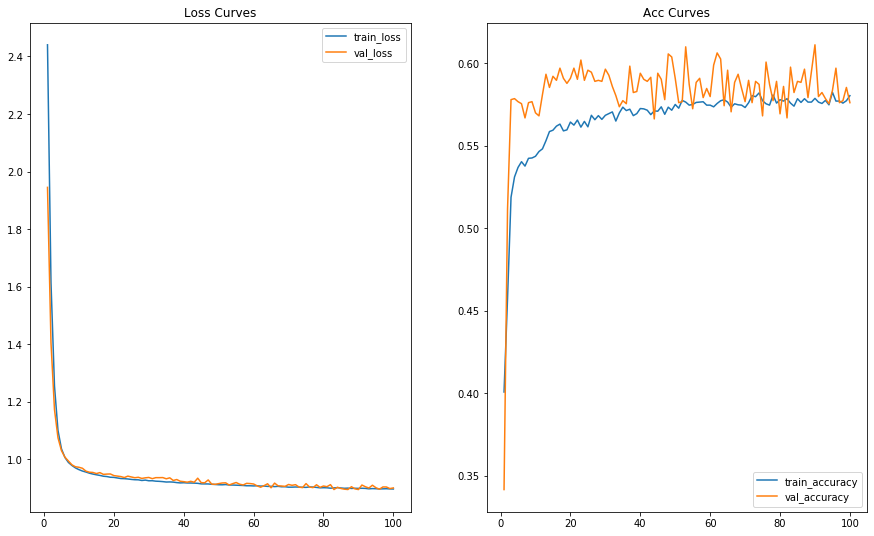

In [17]:
f, axs = plt.subplots(1,2,figsize=(15,9))

axs[0].plot(list(range(1,NUM_EPOCHS+1)),fitted.history['loss'],label='train_loss')
axs[0].plot(list(range(1,NUM_EPOCHS+1)),fitted.history['val_loss'],label='val_loss')
axs[0].set_title('Loss Curves')
axs[0].legend()

axs[1].plot(list(range(1,NUM_EPOCHS+1)),fitted.history['accuracy'],label='train_accuracy')
axs[1].plot(list(range(1,NUM_EPOCHS+1)),fitted.history['val_accuracy'],label='val_accuracy')
axs[1].set_title('Acc Curves')
axs[1].legend()

plt.show()

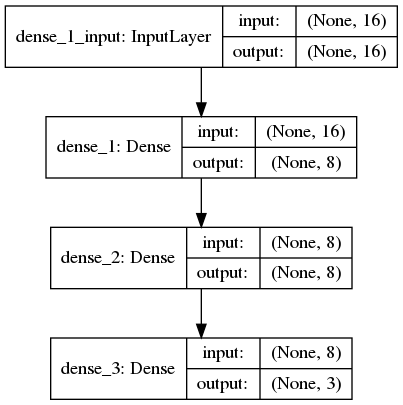

In [10]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [11]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [12]:
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [13]:
from ann_visualizer.visualize import ann_viz;
from keras.models import model_from_json

In [14]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()

model = model_from_json(loaded_model_json)

ann_viz(model, title="Artificial Neural network - Model Visualization")